In [1]:
##Version español.
##Voy a utilizar un dataframe que contiene informacion sobre distintos autos para generar modelos que predigan sus precios. Luego voy a seleccionar el mejor modelo.

#Importo las librerias necesarias para el analisis

import pandas as pd  
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Voy a realizar un heatmap para ver la relación entre las características de cada auto y su precio.

In [3]:
df_corr=df.corr()
df_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [4]:
df_price=df_corr[["price"]].copy() ##Creo un df que muestra la correlación entre cada variable numérica y el precio.
df_price.sort_values(by="price",ascending=True,inplace=True)
df_price

,price
highway-mpg,-0.704692
city-mpg,-0.686571
gas,-0.110326
peak-rpm,-0.101616
symboling,-0.082391
compression-ratio,0.071107
stroke,0.082310
diesel,0.110326
normalized-losses,0.133999
height,0.135486


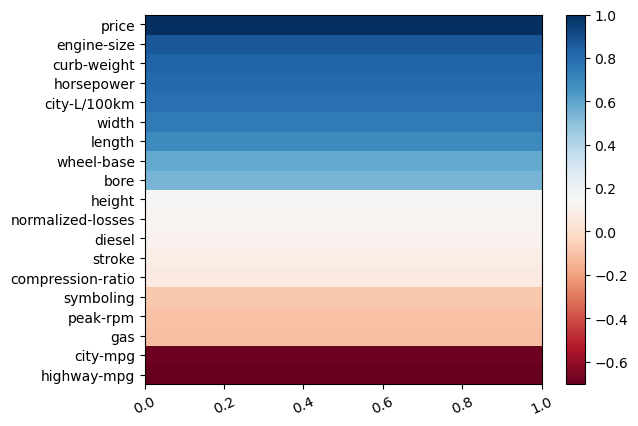

In [5]:
fig, ax = plt.subplots()
im = ax.pcolor(df_price, cmap='RdBu')

#label names
row_labels = df_price.index.tolist()

#move ticks and labels to the center
ax.set_yticks(np.arange(df_price.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_yticklabels(row_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=25)

fig.colorbar(im)
plt.show()

Se puede visualizar fácilmente las variables que tienen una correlación con el precio, siendo estas las que toman valores más lejanos al 0.

Comprobemos esto con algunos gráficos.

Se buscan las variables con un "Correlation Coefficient" cercano a 1 y un "P-value" menor a 0,01.

In [6]:
import seaborn as sns
from scipy import stats

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


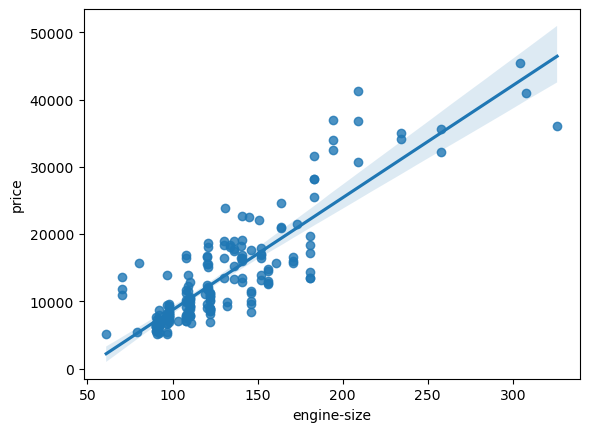

In [7]:
sns.regplot(x="engine-size",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P = 1.7495471144477352e-31


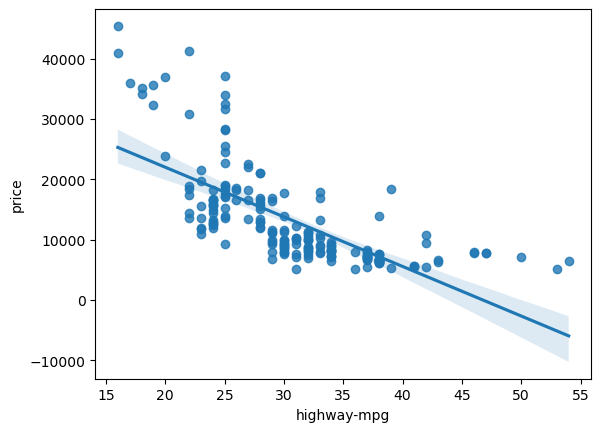

In [8]:
sns.regplot(x="highway-mpg",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1354863075680597  with a P-value of P = 0.055146273251013435


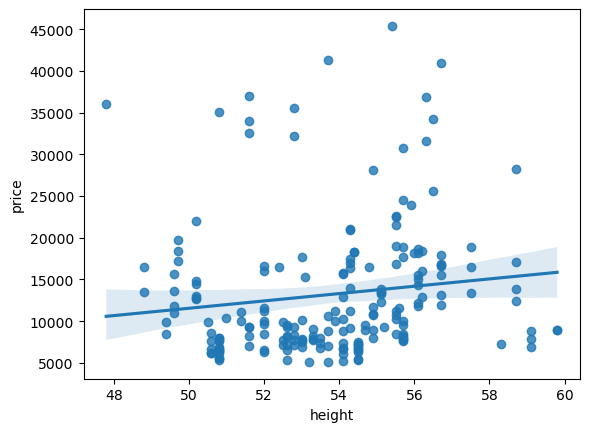

In [9]:
sns.regplot(x="height",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['height'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.08239118716962358  with a P-value of P = 0.2449148765716521


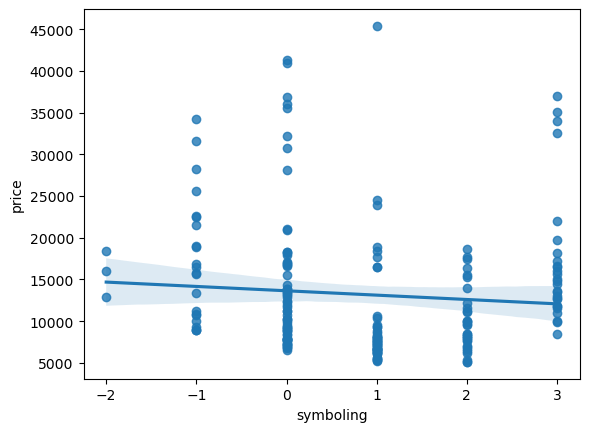

In [10]:
sns.regplot(x="symboling",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['symboling'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.11032556467564855  with a P-value of P = 0.11896254438091342


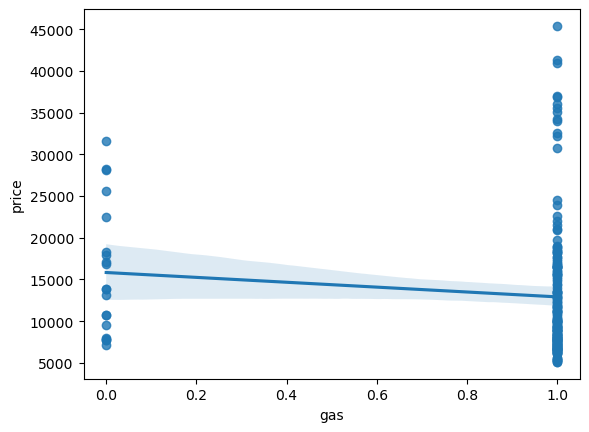

In [11]:
sns.regplot(x="gas",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['gas'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17


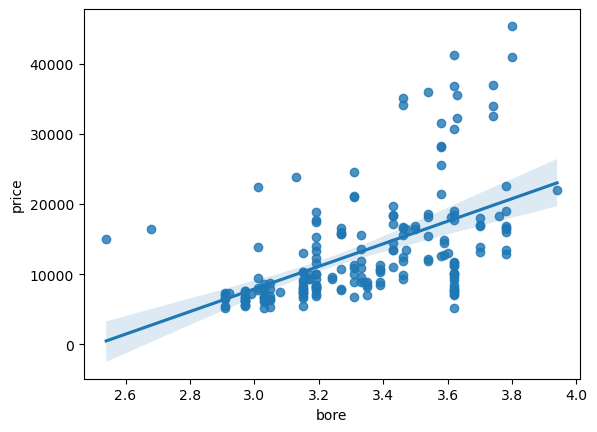

In [12]:
sns.regplot(x="bore",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

En conclusión, las variables numéricas a tener en cuenta al momento de realizar el modelo predictivo son:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Ya encontramos las principales variables numéricas que inciden en el precio de los autos.
Analicemos ahora las variables categóricas por medio del metodo ANOVA (Analysis Of Variance).

In [13]:
df.describe(include=['object']) #Veamos una descripcion de las variables categóricas.

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


ANOVA es un método que analiza qué tan diferentes son distintos grupos de una categoría. Así que veremos mediante boxplots las distintas categorías 
para identificar cuales pueden ser relevantes para determinar el precio de un auto.

<AxesSubplot:xlabel='horsepower-binned', ylabel='price'>

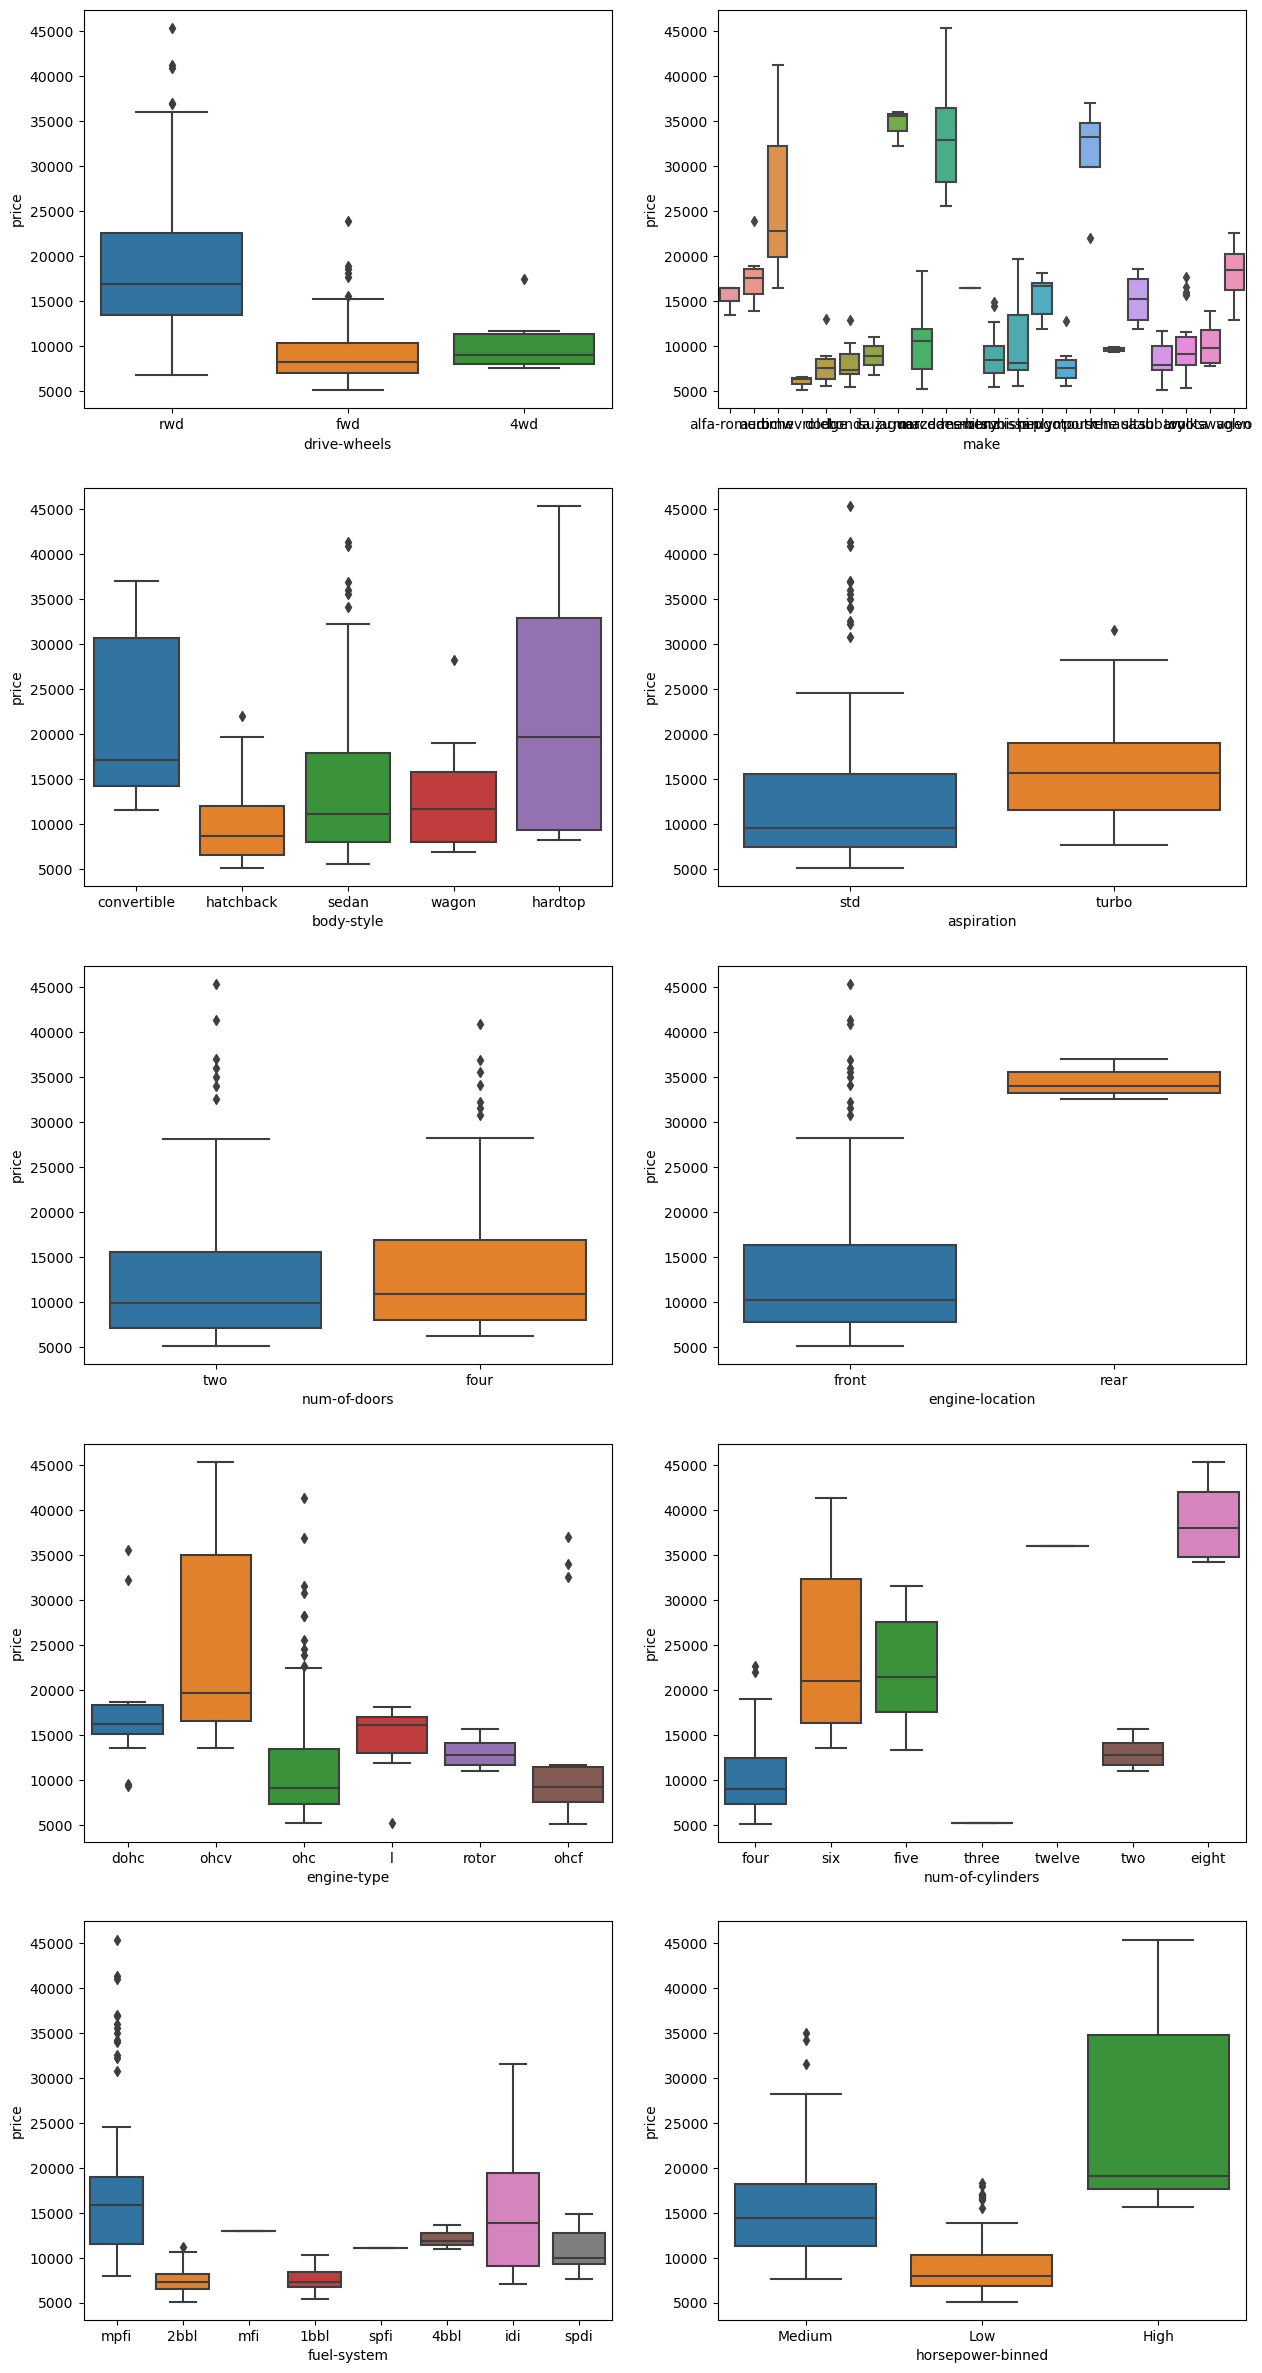

In [14]:
fig=plt.figure(figsize=(15,30))
ax1=fig.add_subplot(521)
ax2=fig.add_subplot(522)
ax3=fig.add_subplot(523)
ax4=fig.add_subplot(524)
ax5=fig.add_subplot(525)
ax6=fig.add_subplot(526)
ax7=fig.add_subplot(527)
ax8=fig.add_subplot(528)
ax9=fig.add_subplot(529)
ax10=fig.add_subplot(5,2,10)
#
sns.boxplot(x="drive-wheels", y="price", data=df,ax=ax1)
sns.boxplot(x="make", y="price", data=df,ax=ax2)
sns.boxplot(x="body-style", y="price", data=df,ax=ax3)
sns.boxplot(x="aspiration", y="price", data=df,ax=ax4)
sns.boxplot(x="num-of-doors", y="price", data=df,ax=ax5)
sns.boxplot(x="engine-location", y="price", data=df,ax=ax6)
sns.boxplot(x="engine-type", y="price", data=df,ax=ax7)
sns.boxplot(x="num-of-cylinders", y="price", data=df,ax=ax8)
sns.boxplot(x="fuel-system", y="price", data=df,ax=ax9)
sns.boxplot(x="horsepower-binned", y="price", data=df,ax=ax10)

Si, son muchos gráficos, pero podemos notar algunas cosas:
1) Las categorías "num of doors", "aspiration" y "fuel-system" no dan demasiada información sobre el precio del auto, así que podemos descartarlas.
2) "engine-location" parece ser muy clara, pero mediante el método .describe() vimos que solo hay 3 autos del grupo "rear". Esto genera un sesgo,
    por lo que no usaremos esa característica.
3) Las categorías más claras parecen ser "horsepower-binned" y "drive-wheels". "horsepower" ya se analizó en las variables numéricas. Utilicemos entonces el método ANOVA para evaluar "drive-wheels".

In [15]:
df_group_test=df[['drive-wheels', 'price']].groupby(['drive-wheels'])
df_group_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [16]:
# ANOVA
f_val, p_val = stats.f_oneway(df_group_test.get_group('fwd')['price'], df_group_test.get_group('rwd')['price'], df_group_test.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


El análisis muestra un buen resultado, con un alto valor de F y un bajo valor de P, indicando una clara significancia estadística. Pero evaluemos cada 
grupo por separado para verificar.

In [17]:
f_val, p_val = stats.f_oneway(df_group_test.get_group('fwd')['price'], df_group_test.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [18]:
f_val, p_val = stats.f_oneway(df_group_test.get_group('4wd')['price'], df_group_test.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [19]:
f_val, p_val = stats.f_oneway(df_group_test.get_group('4wd')['price'], df_group_test.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<p>En resumen, las variables relevantes son:</p>

Variables numéricas:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Variables categóricas:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>Ahora que conocemos las variables relevantes, podemos construir nuestro modelo.</p>

<h2 id="ref1">Training and Testing</h2>

<p>Ya estamos en condiciones de construir distintos modelos y buscar el mejor de ellos.</p>
<p>Ubicaremos la característica a predecir <b>price</b> en un dataframe separado <b>y_data</b>:</p>

In [20]:
y_data = df['price'] #este es el target
x_data=df.drop('price',axis=1) #estas son las variables independientes

<p>Luego separemos la data en "training" y "testing".</p>

In [21]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("numero de muestras de test :", x_test.shape[0])
print("numero de muestras de training:",x_train.shape[0])


numero de muestras de test : 21
numero de muestras de training: 180


Empecemos con modelos de regresion lineal.
Para eso usaremos <b>LinearRegression</b> del modulo <b>linear_model</b>.

In [22]:
from sklearn.linear_model import LinearRegression

lre=LinearRegression() ##Creo objeto LinearRegression
lre.fit(x_train[['horsepower']], y_train) ##Ajusto el modelo con los datos de training de "horsepower" y "price"

LinearRegression()

In [23]:
lre.score(x_test[['horsepower']], y_test) #Evaluo el R^2 del modelo para los datos de test

0.3635875575078824

In [24]:
lre.score(x_train[['horsepower']], y_train) #Evaluo el R^2 del modelo para los datos de train

0.6619724197515103

El R^2 del test es 0,36. Es un valor muy bajo, dando a entender que este modelo no es adecuado. 

Esto puede deberse a la falta de datos de test. Utilicemos "Cross Validation" para resolver este problema. 

<h2>Cross-Validation Score</h2>

In [25]:
from sklearn.model_selection import cross_val_score 

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) #Realizo un Cross Validation con 4 folds

In [26]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Estos son los valores de R^2 de cada evaluacion realizada.

In [27]:
print("el promedio de los folds es:", Rcross.mean(), "y su desviacion estandar:" , Rcross.std())

el promedio de los folds es: 0.522009915042119 y su desviacion estandar: 0.29118394447560286


asi vemos que el R^2 promedio del modelo es aproximadamente 0.5, por lo que no es un buen modelo.

In [28]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [29]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)

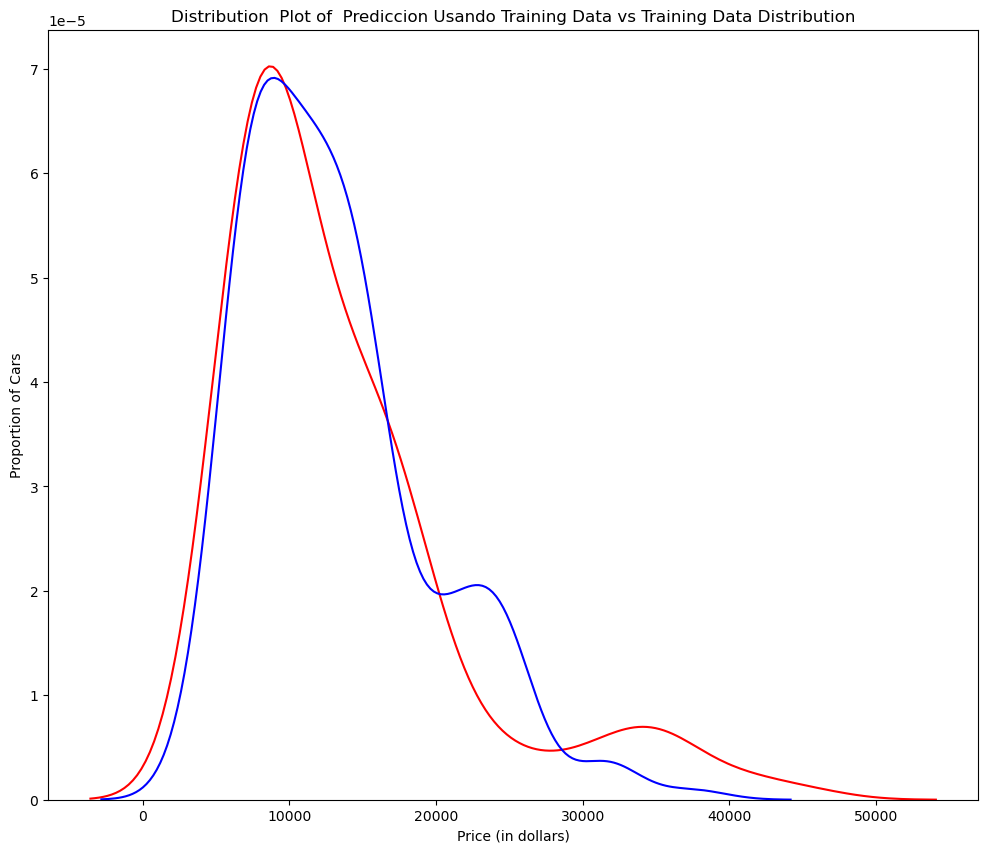

In [30]:
Title = 'Distribution  Plot of  Prediccion Usando Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat, "Valores Reales (Train)", "Valores Predichos (Train)", Title)

Podemos ver que el modelo (linea azul) presenta errores en muchos rangos de valores.
<p>Veamos entonces otros modelos.</p>

<h2>Regresion Lineal Multiple</h2>

In [31]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [32]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) #Realizo predicciones de train y de test
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [33]:
import seaborn as sns

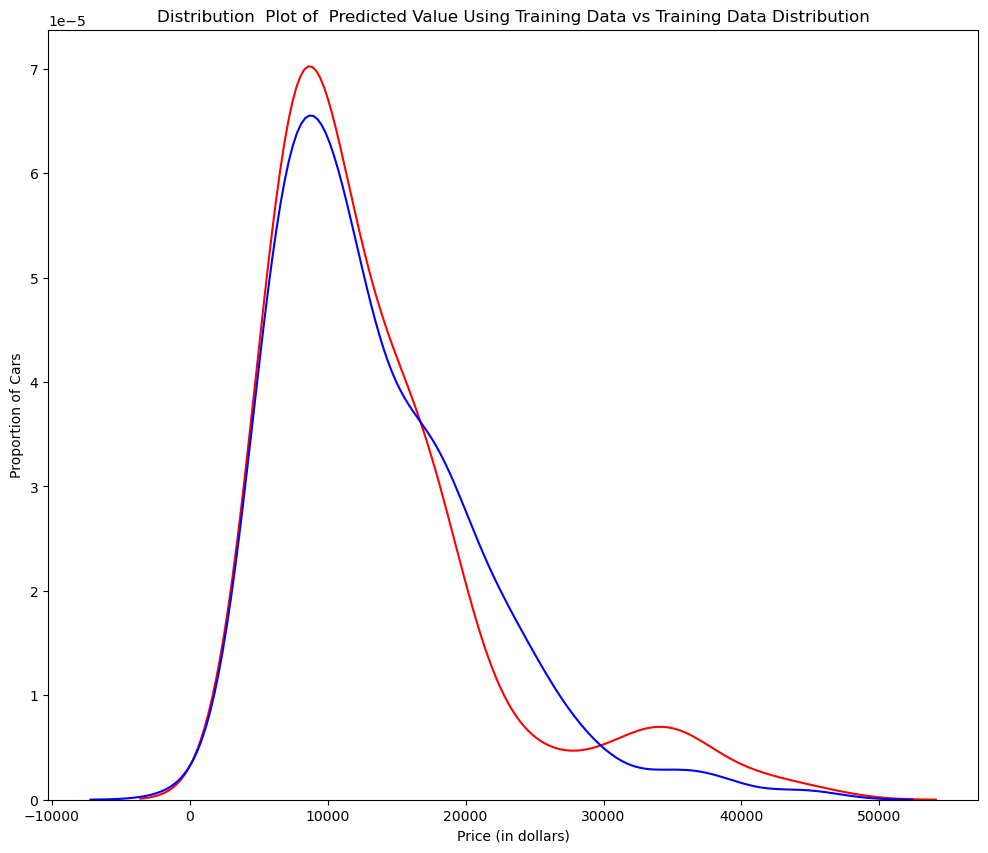

In [34]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title) #Veamos la precision del modelo para los datos del train

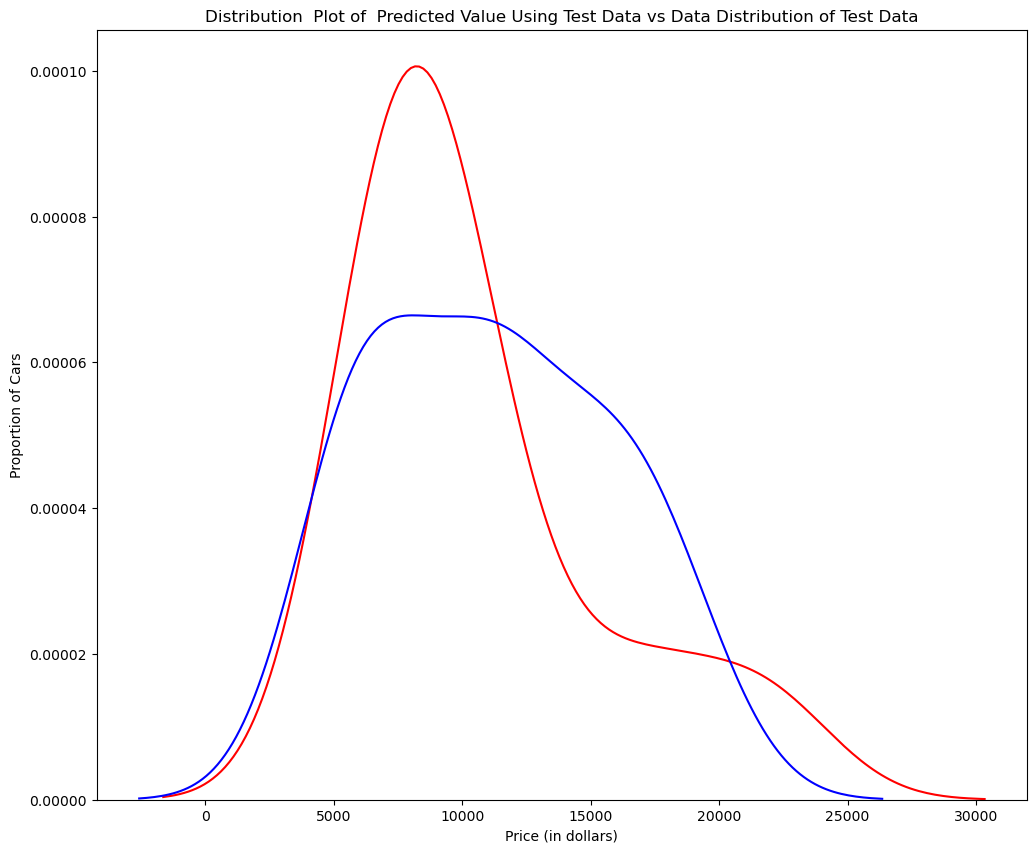

In [35]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title) #Ahora veamos la precision del modelo sobre los datos del test

Se puede ver que el modelo predice mucho mejor los datos del train que los del test. Esto suele darse en casos de Overfitting.

Veamos si una regresion polinómica es más precisa.

<h2>Regresion Polinomica</h2>

Usemos el %60 de los datos para el training y el resto para el test

In [36]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Vamos a realizar una transformacion polinomica de la variable <b>'horsepower'</b>. Podemos utilizar una funcion para determinar el grado del polinomio que maximice el R^2.

Text(0.5, 1.0, 'R^2 Using Test Data')

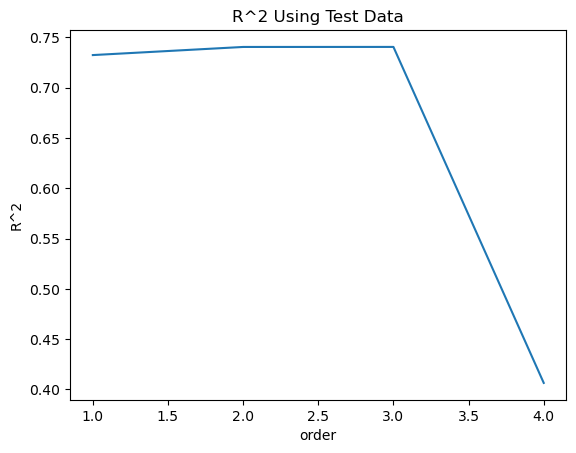

In [37]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data') 

Parecería ser que un polinomio de grado 4 maximiza el R^2. Comprobemoslo.

In [38]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

yhat = poly.predict(x_test_pr) #Evaluo el modelo con los datos de test

In [39]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform): ##Esta funcion permite visualizar los datos
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

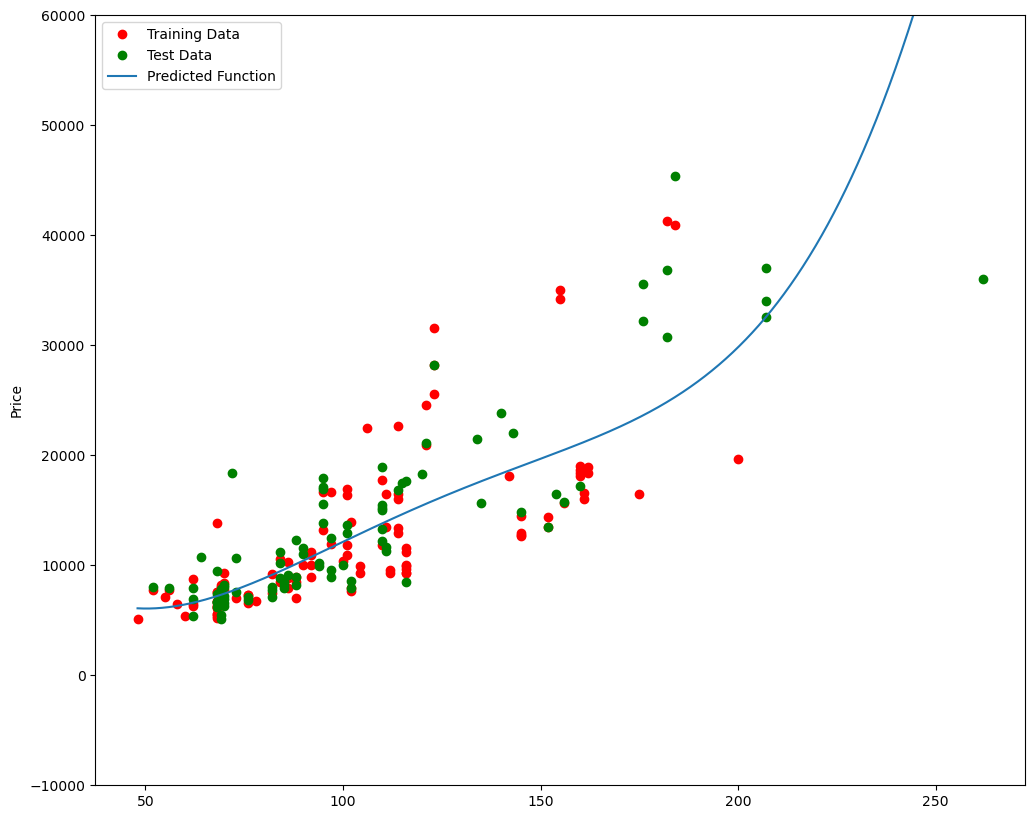

In [40]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

Figura: Una regresion polinomica con datos de training (rojos), datos de test (verdes) y la prediccion del modelo (linea azul).

In [41]:
from ipywidgets import interact, interactive, fixed, interact_manual  ##Grafico interactivo

def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train,y_test, poly, pr)
    
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h2 id="ref4">Ridge Regression and Grid Search</h2>

Utilicemos ahora el metodo grid search para encontrar el parámetro "alpha" más adecuado y si es necesaria la normalizacion de los datos (simultaneamente).

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [43]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}] #We create a dictionary of parameter values
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [44]:
RR=Ridge() #Crea un ridge regression
RR

Ridge()

In [45]:
Grid1 = GridSearchCV(RR, parameters1,cv=4) #Crea un grid search object

In [46]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg',"city-mpg"]], y_data) #ajusta el modelo

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [47]:
BestRR=Grid1.best_estimator_
BestRR  ##Busca el mejor valor de alpha

Ridge(alpha=10000)

In [48]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg',"city-mpg"]], y_test) ##R^2 del modelo

0.8411467788811628

Con un R^2 de 0.84, podemos decir que este es un buen modelo para predecir el precio de un auto.

In [49]:
y_pred=Grid1.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg',"city-mpg"]])

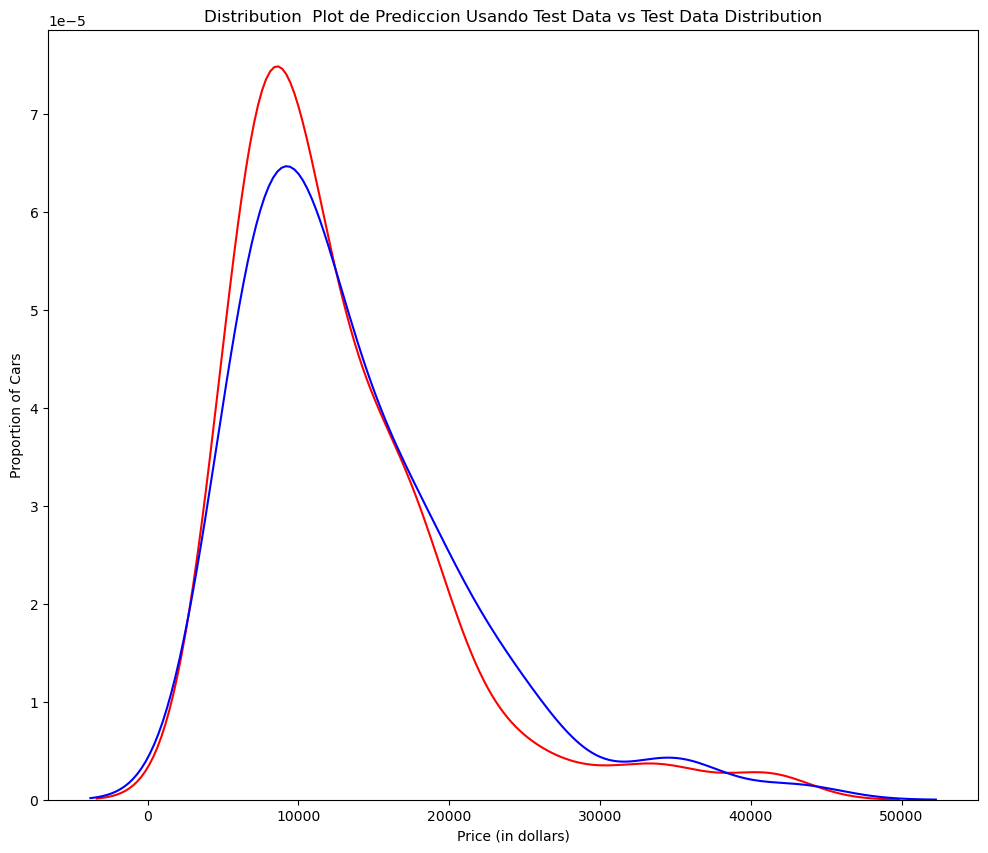

In [50]:
Title = 'Distribution  Plot de Prediccion Usando Test Data vs Test Data Distribution'
DistributionPlot(y_train, y_pred, "Valores Reales (Test)", "Valores Predichos (Test)", Title)

Finalmente podemos ver que las predicciones son mucho más precisas que antes, es decir que nuestro modelo es mucho mas adecuado para predecir el precio de un auto.

Muchas Gracias.